<a href="https://colab.research.google.com/github/raghzzzspace/Machine-Learning-Projects/blob/main/star_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 17)                306       
                                                                 
 dense_33 (Dense)            (None, 8)                 144       
                                                                 
 dense_34 (Dense)            (None, 4)                 36        
                                                                 
 dense_35 (Dense)            (None, 3)                 15        
                                                                 
Total params: 501 (1.96 KB)
Trainable params: 501 (1.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
80/80 [==============================] - 2s 6ms/step - loss: 0.9382 - accuracy: 0.6072 - val_loss: 0.9183 - val_accuracy: 0.6180
Epoch 2/200
80/

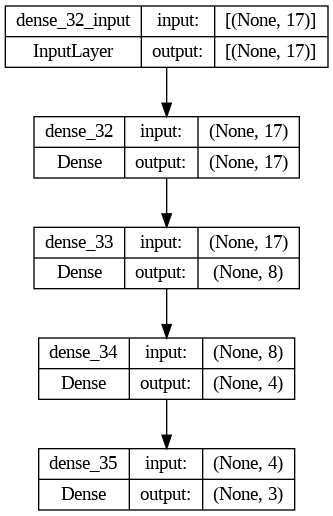

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

# Load data
file_path = '/content/star_classification.csv'
df = pd.read_csv(file_path, header=0)
df = df.loc[:10000]

# Features and target variable
x = df.drop('class', axis=1)  # Features (excluding the target column)
y = df['class']  # Target variable

# One-hot encode target variable
y = pd.get_dummies(y).values

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

# Normalize the data
scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)

# Building Neural Network Model
model = Sequential()

# Add input layer
model.add(Dense(units=17, activation='sigmoid', input_shape=(x_train_normalized.shape[1],)))

# Add hidden layers
model.add(Dense(units=8, activation='sigmoid'))
model.add(Dense(units=4, activation='sigmoid'))

# Add the output layer
num_classes = y.shape[1]
model.add(Dense(units=num_classes, activation='softmax'))  # For multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model
model.summary()

# Train the model
model.fit(x_train_normalized, y_train, epochs=200, batch_size=50, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test_normalized, y_test)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Plot the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
